## ME7: Neural Networks

We will have serveral exercises of neural networks using Sklearn neural network multi-layer perceptron (MLP) packages. Although keras with tensorflow framework is more commonly used in ML, this will be a good start to know how NN can be used for classification and regression problems. Keras/tensorflow will be explored in the next assignment. 

Please read the document on Scikit Learn:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Write your name and your collaborators if any. 

- Sophie Luehmann
- 

### Set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "NN"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Utility functions

In [26]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)
        
def plot_class_regions_for_classifier_subplot_iloc(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X.iloc[:, 0].min()
    x_max = X.iloc[:, 0].max()
    y_min = X.iloc[:, 1].min()
    y_max = X.iloc[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()
    
def plot_class_regions_for_classifier_iloc(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X.iloc[:, 0].min()
    x_max = X.iloc[:, 0].max()
    y_min = X.iloc[:, 1].min()
    y_max = X.iloc[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Activation functions

- You should explore these activation functions to find the best function for your dataset(s). 

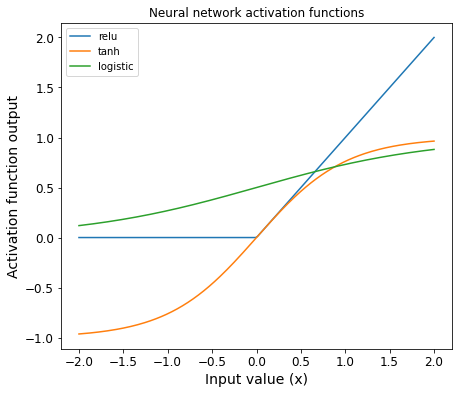

In [3]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

## Part 0

- The examples in Part 0 build classifiers and regressors using neural networks. 

- We will use synthetic datasets to demonstrate the NN modeling process.

- Classifier examples demonstrate the model performance through the class boundary with model score (overall accuracy). 


### Neural networks on Classification
- Read and run each cell of the given examples and understand the results

- Tasks: you might have warnings related to data normalization or/and number of iterations. 
    - <span style="color:red"> Fix the issues and remove warnings (if possible).  </span>
     

#### SkLearn Neural networks for classification
- Please also read the document on Scikit Learn   
    - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


### (1) Synthetic dataset1: Binary classification

- A synthetic dataset contains two features (x1 and x2)
- We use single hidden layer NN. 

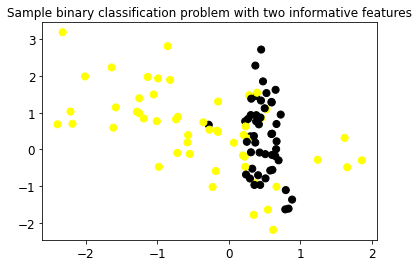

In [4]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50, cmap=cmap_bold)
plt.show()

#### NN modeling on synthetic dataset 1

- We may need to increase the number of iterations or scale the data (normalization).

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


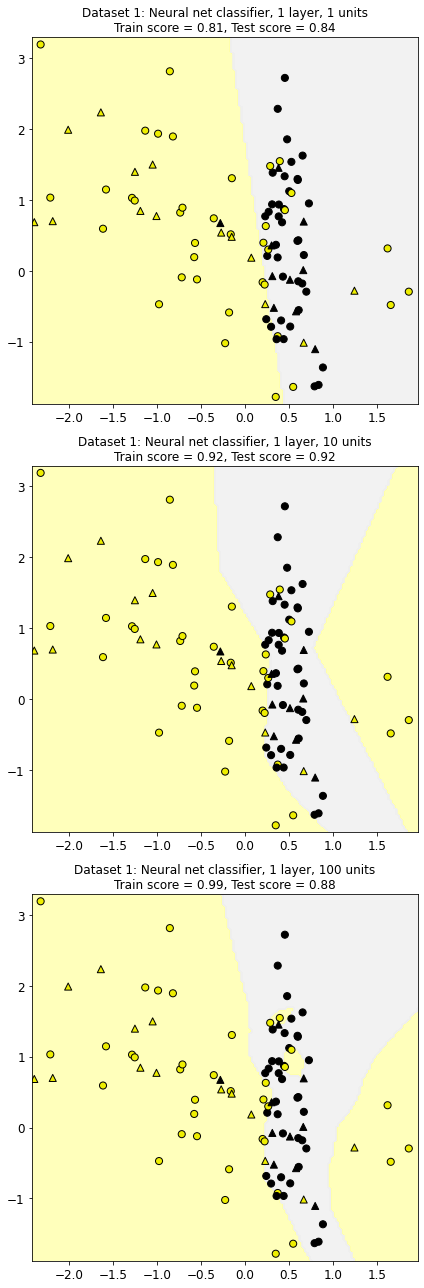

In [5]:
from sklearn.neural_network import MLPClassifier

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)


for units, axis in zip([1, 10, 100], subaxes):
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### (2) Synthetic dataset 2: binary classification

- More difficult synthetic dataset for classification (binary) with classes that are not linearly separable.
- We apply single hidden layer NN.

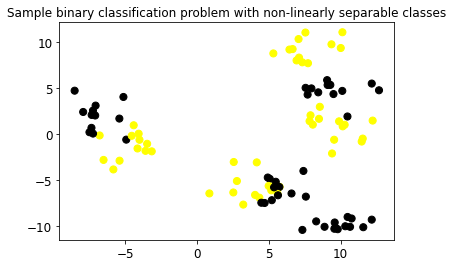

In [6]:
# generate a synthetic dataset
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

#### NN modeling on synthetic dataset 2

- We may need to increase the number of iterations or scale the data (normalization).

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


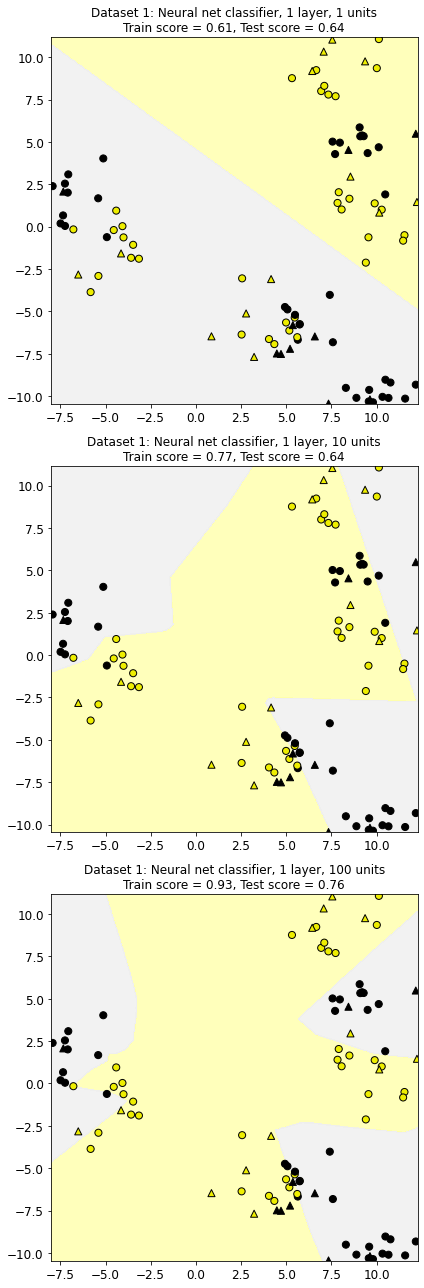

In [7]:
from sklearn.neural_network import MLPClassifier

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)


for units, axis in zip([1, 10, 100], subaxes):
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Apply two hidden layer NN on synthetic dataset 2

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


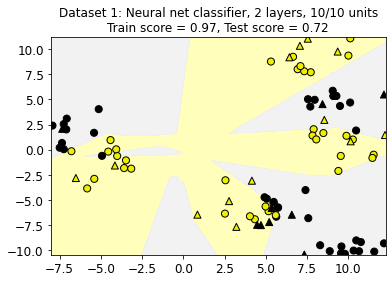

In [8]:
#from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# model training with two hidden layers
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### NN on synthetic dataset 2: Regularization parameter: alpha

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

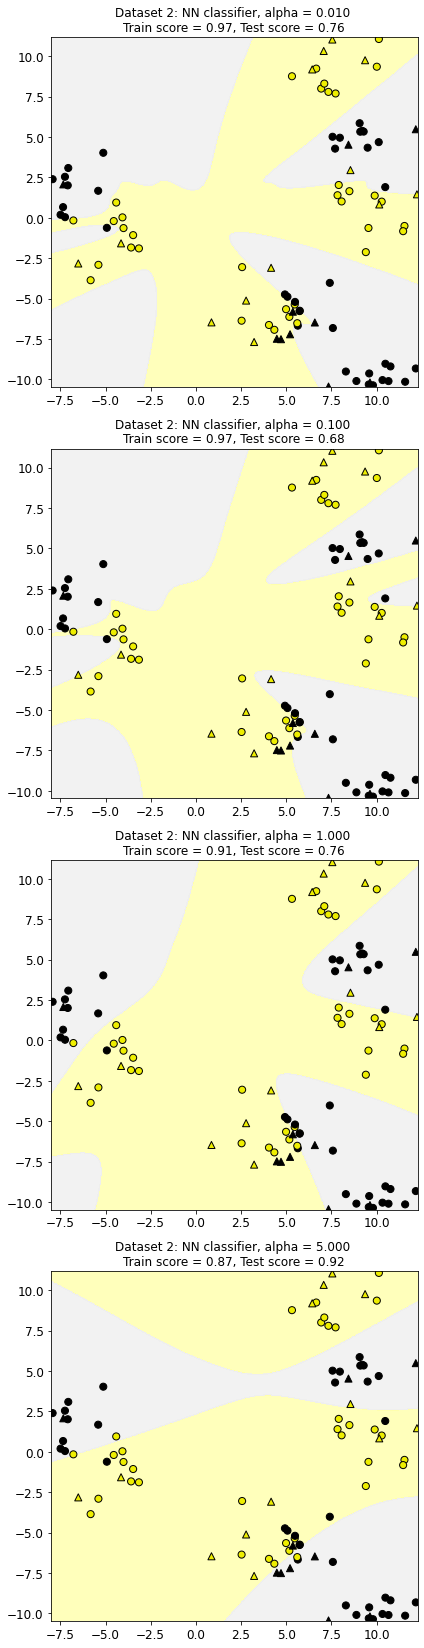

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### NN on synthetic dataset2: the effect of different choices of activation function

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(max_iter = 500, solver='lbfgs', activation = this_activation,
                         alpha = 0.01, hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Neural networks on Regression

- NN can be also applied for regression problems.

#### sklearn Neural Networks for regression

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

#### A synthetic dataset with one feature

- A simple example that can be visualized the regression. 

In [ ]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

##### A NN regressor modeling

In [ ]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 0.1, 1.0, 100], thisaxisrow):
        # create a model
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

## Part 1

### NN Application to real-world dataset for classification

- You will be working on two datasets: (1) Breast cancer dataset, and (2) fruit dataset

- Before you start NN modeling, prepare the datasets (a) a dataset without normalization, (b) a dataset with normalization. 

- Please make sure that training data and test data must be the same scale. This means that the normalization process should be done before you split the data into training data and test data.  

- For each dataset, conduct classificaton modeling and evalute the model performance. We would suggest you use evaluation metrics for classification (accuracy, precision, recall, f1-score, etc.)

    - 1. Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) for each layer.
       - You may want to use different number of units for the two hidden layers. 

    - 2. Find out the optimal alpha parameter value for regularization.
        - alpha = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

    - 3. Apply three different activation functions and show the effect.
        - activation = ['tanh', relu', 'logistic']
        
    - 4. (extra) Build a NN model with 3 hidden layers and check if the model is improvled. 

- Compare the results without normalization and with normalization. 


### 1. Breast Cancer dataset

In [ ]:
# Breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer.shape) # 30 attributes

#### Add cells for your modeling below.

#### Let's first choose the first two attributes and display the data

- This is simply for visualization purpose. You can include most (or all) attributes for X. 

In [ ]:
# You should choose some attributes for X
# You also should check X's shape and y_cancer's shape
# We show how to do below as an example,
# but you should be able to do this process on your own. 
from sklearn import preprocessing


X = X_cancer[:, :2]
print(X.shape)
print(y_cancer.shape)



In [ ]:
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y_cancer,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on non-normalized data

- We are using all 30 attribues of X
- X is not normalized. 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y_cancer, random_state=0)

# model training with two hidden layers
nnclf = MLPClassifier(hidden_layer_sizes = [20,50], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')


#### Data normalization

- We are using all 30 attribues of X
- Please keep in mind that we do not normalize y values (it is class label!)

In [ ]:
#===========================
#normalization
X_scaled = preprocessing.normalize(X)

#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on normalized data

- We are using all 30 attribues of X
- X is normalized. 

In [ ]:

Xn_train, Xn_test, y_train, y_test = train_test_split(X_scaled, y_cancer, random_state=0)

# model training with two hidden layers
nnclf = MLPClassifier(hidden_layer_sizes = [20, 50], solver='lbfgs',
                     random_state = 0).fit(Xn_train, y_train)

plot_class_regions_for_classifier(nnclf, Xn_train, y_train, Xn_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 20/50 units')

#### Find the optimal alpha parameter value for regularization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cancer, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    
#optimal Alpha parameter value: 5.0

#### Apply different activation functions (logistic, tanh, relu) and show the effect. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cancer, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'logistic',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

plot_class_regions_for_classifier(nnclf, X_train, y_train,
                                         X_test, y_test, title)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cancer, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'relu',
                         alpha = 5.0,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'
    
plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test, title)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cancer, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = 5.0,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'
    
plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test, title)


### (2) Fruit dataset

- We show how to read txt format files using Pandas read_csv() function. 
- Make sure you check shape of X and shape of y

In [12]:
# fruits dataset
fruits = pd.read_csv('./data/fruit_data_with_colors.txt', sep='\t', engine='python')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']

X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


print(X_fruits_2d.shape)
print(y_fruits_2d.shape)


#print(X_fruits_2d)

(59, 2)
(59,)


#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on not normalized data

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


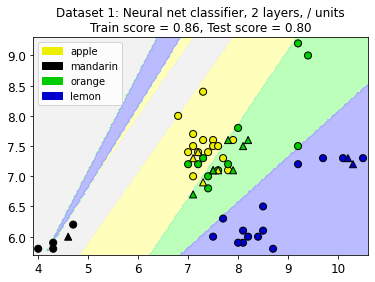

In [21]:
import matplotlib.patches as mpatches
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)

# model training with two hidden layers
nnclf = MLPClassifier(hidden_layer_sizes = [10,10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

#print(X_train.iloc[0:44,0])
##print(X_train[:, 0])
plot_class_regions_for_classifier_iloc(nnclf, X_train, y_train, X_test, y_test, 'Dataset 1: Neural net classifier, 2 layers, / units', target_names = target_names_fruits) 
                                  

#### Apply varying regularization parameter alpha on non-normalized data

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

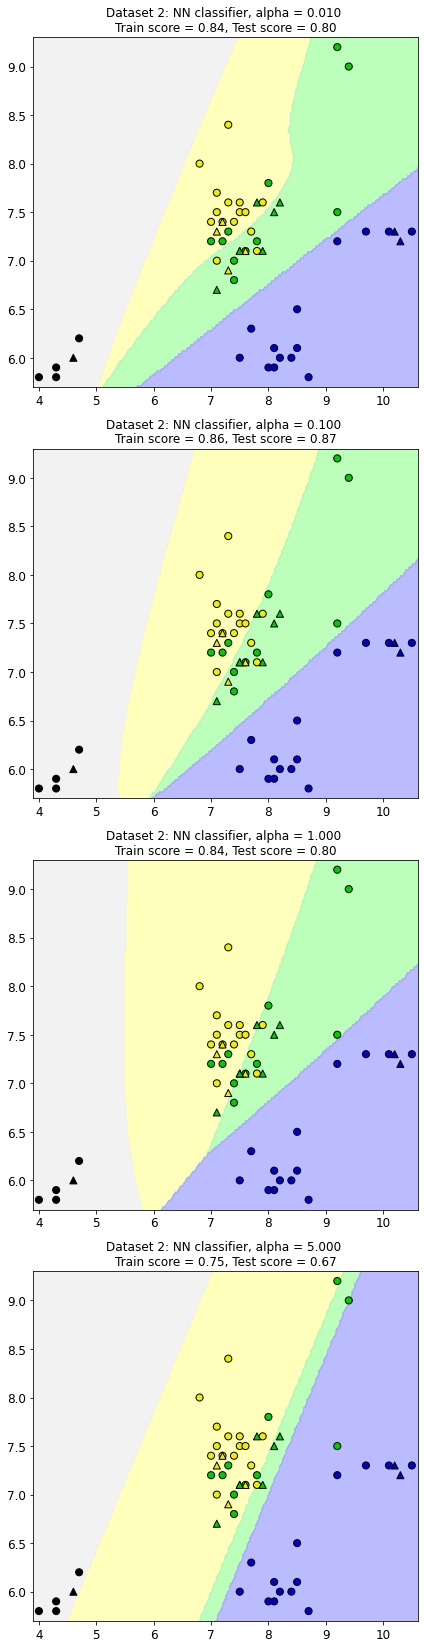

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot_iloc(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    
#optimal Alpha parameter value: 0.010

#### Apply three different activation functions on non-normalized data¶

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

X_train

#plot_class_regions_for_classifier_iloc(nnclf, X_train, y_train,
 #                                        X_test, y_test, title)

/Users/gabrielsuarez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,height,width
42,7.2,7.2
48,10.1,7.3
7,4.0,5.8
14,7.3,7.6
32,7.0,7.2
49,8.7,5.8
29,7.4,7.0
37,7.3,7.3
56,8.1,5.9
18,7.1,7.5


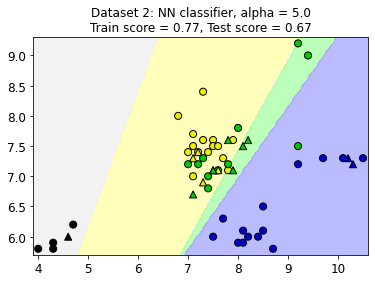

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'relu',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

plot_class_regions_for_classifier_iloc(nnclf, X_train, y_train,
                                         X_test, y_test, title)

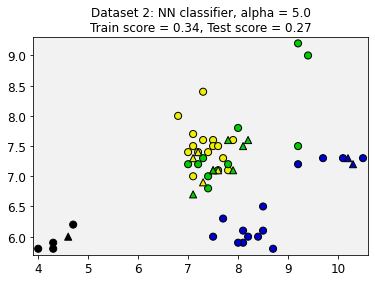

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'logistic',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

plot_class_regions_for_classifier_iloc(nnclf, X_train, y_train,
                                         X_test, y_test, title)

### Normalize data

In [ ]:
X_fscaled = preprocessing.normalize(X_fruits_2d)

#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on normalized data

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_fscaled, y_fruits_2d, random_state=0)

# model training with two hidden layers
nnclf = MLPClassifier(hidden_layer_sizes = [50,20], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 50/20 units')

#### Find the optimal alpha parameter value for regularization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fscaled, y_fruits_2d, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    
#optimal Alpha parameter value: 0.010

#### Apply different activation functions (logistic, tanh, relu) and show the effect. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fscaled, y_fruits_2d, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'logistic',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

plot_class_regions_for_classifier(nnclf, X_train, y_train,
                                         X_test, y_test, title)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fscaled, y_fruits_2d, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

plot_class_regions_for_classifier(nnclf, X_train, y_train,
                                         X_test, y_test, title)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fscaled, y_fruits_2d, random_state=0)


nnclf = MLPClassifier(solver='lbfgs', activation = 'relu',
                     alpha = 5.0,
                     hidden_layer_sizes = [100, 100],
                     random_state = 0).fit(X_train, y_train)

title = 'Dataset 2: NN classifier, alpha = 5.0'

plot_class_regions_for_classifier(nnclf, X_train, y_train,
                                         X_test, y_test, title)

## Part 2

- Write a short summary of your analysis result of neural networks (submitted on Canvas). 

- Provide a link to the notebook on Github.